# **PAYMENT DATE PREDICTION**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/H2HBABBA2557.csv')
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2019-05-24 00:00:00,2019.0,1.929315e+09,2019-05-14,20190514,20190514,20190529.0,USD,RV,1.0,NaN,41005.61,20190514.0,NAH4,1.929315e+09,0
1,U001,0200769623,WAL-MAR corp,2019-02-12 00:00:00,2019.0,1.928721e+09,2019-02-01,20190201,20190201,20190216.0,USD,RV,1.0,NaN,25260.12,20190201.0,NAH4,1.928721e+09,0
2,U001,0200744019,TARG llc,NaN,2020.0,1.930708e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,NaN,7664.54,20200327.0,NAA8,1.930708e+09,1
3,U001,0200705089,JETR llc,NaN,2020.0,1.930788e+09,2020-04-15,20200415,20200415,20200430.0,USD,RV,1.0,NaN,19509.74,20200415.0,NAA8,1.930788e+09,1
4,U001,0200769623,WAL-MAR us,2019-04-23 00:00:00,2019.0,1.929115e+09,2019-04-12,20190410,20190412,20190427.0,USD,RV,1.0,NaN,1561.80,20190412.0,NAH4,1.929115e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200782001,GORDO trust,2019-11-26 00:00:00,2019.0,1.930139e+09,2019-11-11,20191111,20191111,20191126.0,USD,RV,1.0,NaN,20270.30,20191111.0,NAA8,1.930139e+09,0
49996,U001,0200769623,WAL-MAR,2019-05-03 00:00:00,2019.0,1.929187e+09,2019-04-23,20190422,20190423,20190508.0,USD,RV,1.0,NaN,38176.05,20190423.0,NAH4,1.929187e+09,0
49997,U001,0200769623,WAL-MAR corp,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-05,20191204,20191205,20191220.0,USD,RV,1.0,NaN,683.91,20191205.0,NAH4,1.930217e+09,0
49998,U001,0200759878,SA,2019-06-07 00:00:00,2019.0,1.929363e+09,2019-05-23,20190522,20190523,20190607.0,USD,RV,1.0,NaN,15072.62,20190523.0,NAH4,1.929363e+09,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [ ]:
#checking total null in each column
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64

In [ ]:
data.isnull().mean()

business_code             0.00000
cust_number               0.00000
name_customer             0.00000
clear_date                0.20000
buisness_year             0.00000
doc_id                    0.00000
posting_date              0.00000
document_create_date      0.00000
document_create_date.1    0.00000
due_in_date               0.00000
invoice_currency          0.00000
document type             0.00000
posting_id                0.00000
area_business             1.00000
total_open_amount         0.00000
baseline_create_date      0.00000
cust_payment_terms        0.00000
invoice_id                0.00016
isOpen                    0.00000
dtype: float64

In [ ]:
#checking total unique in each column
data.nunique()

business_code                 6
cust_number                1398
name_customer              4161
clear_date                  399
buisness_year                 2
doc_id                    48789
posting_date                505
document_create_date        510
document_create_date.1      505
due_in_date                 545
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44189
baseline_create_date        507
cust_payment_terms           70
invoice_id                48781
isOpen                        2
dtype: int64

# **PREPROCESSING**

In [ ]:
# slicing tha dataset by removing rows having clear_date as null
# we will use this data at last to check our model

clear_date_null = data[data['clear_date'].isnull()].copy()

In [ ]:
clear_date_null_copy = clear_date_null.copy()

In [ ]:
# copy of data to load in database
db_data = clear_date_null.copy()

In [ ]:
clear_date_null.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2,U001,0200744019,TARG llc,NaN,2020.0,1.930708e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,NaN,7664.54,20200327.0,NAA8,1.930708e+09,1
3,U001,0200705089,JETR llc,NaN,2020.0,1.930788e+09,2020-04-15,20200415,20200415,20200430.0,USD,RV,1.0,NaN,19509.74,20200415.0,NAA8,1.930788e+09,1
7,U001,0200793513,KROGER associates,NaN,2020.0,1.930779e+09,2020-04-12,20200412,20200412,20200427.0,USD,RV,1.0,NaN,28910.14,20200412.0,NAA8,1.930779e+09,1
10,U001,0200020431,DEC systems,NaN,2020.0,1.930600e+09,2020-03-04,20200304,20200304,20200308.0,USD,RV,1.0,NaN,4408.13,20200301.0,NAM1,1.930600e+09,1
16,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930714e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,NaN,13155.10,20200328.0,NAH4,1.930714e+09,1


In [ ]:
#dropping area_business as it has same value for all the rows

data.drop(['area_business'], axis = 1, inplace=True)

In [ ]:
# dropping rows having clear_date as NULL because this is the main feature for 
# prediction and do not make any sense to keep those rows having clear_date as NULL

data.dropna(subset=['clear_date'], inplace=True)

In [ ]:
data.shape

(40000, 18)

In [ ]:
data.drop(['document_create_date'], axis=1, inplace=True)

In [ ]:
#converting into date time format in data

data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'], format='%Y%m%d')
data['clear_date'] = pd.to_datetime(data['clear_date'])
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'], format='%Y%m%d')

In [ ]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2019-05-24,2019.0,1.929315e+09,2019-05-14,2019-05-14,2019-05-29,USD,RV,1.0,41005.61,2019-05-14,NAH4,1.929315e+09,0
1,U001,0200769623,WAL-MAR corp,2019-02-12,2019.0,1.928721e+09,2019-02-01,2019-02-01,2019-02-16,USD,RV,1.0,25260.12,2019-02-01,NAH4,1.928721e+09,0
4,U001,0200769623,WAL-MAR us,2019-04-23,2019.0,1.929115e+09,2019-04-12,2019-04-12,2019-04-27,USD,RV,1.0,1561.80,2019-04-12,NAH4,1.929115e+09,0
5,CA02,0140104249,SOB corporation,2020-03-16,2020.0,2.960614e+09,2020-02-18,2020-02-18,2020-03-06,CAD,RV,1.0,3999.67,2020-02-25,CA10,2.960614e+09,0
6,U001,0200726979,BJ'S,2020-03-04,2020.0,1.930539e+09,2020-02-18,2020-02-18,2020-03-04,USD,RV,1.0,544.62,2020-02-18,NAA8,1.930539e+09,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  object        
 1   cust_number             40000 non-null  object        
 2   name_customer           40000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  float64       
 5   doc_id                  40000 non-null  float64       
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date.1  40000 non-null  datetime64[ns]
 8   due_in_date             40000 non-null  datetime64[ns]
 9   invoice_currency        40000 non-null  object        
 10  document type           40000 non-null  object        
 11  posting_id              40000 non-null  float64       
 12  total_open_amount       40000 non-null  float6

##### Checking anomalies

In [ ]:
data[data['clear_date']<data['baseline_create_date']].shape

(9, 17)

In [ ]:
data[data['baseline_create_date']>data['due_in_date']].shape

(0, 17)

In [ ]:
data[data['posting_date']>data['due_in_date']].shape

(117, 17)

In [ ]:
data[data['clear_date']<data['due_in_date']].shape 

(14577, 17)

In [ ]:
data.drop(data[data['posting_date']>data['due_in_date']].index, inplace = True)

##### Creating delay column

In [ ]:
data.drop(data[data['clear_date']<data['baseline_create_date']].index, inplace = True)

In [ ]:
data['delay'] = (data['clear_date']-data['due_in_date']).dt.days

In [ ]:
data.shape

(39874, 18)

In [ ]:
data.sort_values(by='posting_date',inplace = True)

In [ ]:
data.nunique()

business_code                 6
cust_number                1325
name_customer              3857
clear_date                  399
buisness_year                 2
doc_id                    38963
posting_date                422
document_create_date.1      422
due_in_date                 488
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         35419
baseline_create_date        429
cust_payment_terms           68
invoice_id                38960
isOpen                        1
delay                       178
dtype: int64

In [ ]:
data.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                3
isOpen                    0
delay                     0
dtype: int64

In [ ]:
data.dropna(subset=['invoice_id'], inplace=True)

In [ ]:
data.drop(columns=['isOpen', 'posting_id','document type'], inplace = True)

In [ ]:
data.shape

(39871, 15)

In [ ]:
data.nunique()

business_code                 6
cust_number                1325
name_customer              3856
clear_date                  399
buisness_year                 2
doc_id                    38960
posting_date                422
document_create_date.1      422
due_in_date                 488
invoice_currency              2
total_open_amount         35416
baseline_create_date        429
cust_payment_terms           68
invoice_id                38960
delay                       177
dtype: int64

##### Changing currency and dropping unncessary columns

In [ ]:
#cheking types of currencies in data

curr_type=pd.unique(data['invoice_currency'])
curr_type

array(['USD', 'CAD'], dtype=object)

In [ ]:
#converting currency from CAD to USD by multiplying by 0.81

data['total_open_amount'] = np.where(data['invoice_currency']=="CAD", data['total_open_amount']*0.81, data['total_open_amount'])

In [ ]:
#dropping invoice_currency column from data

data.drop('invoice_currency',axis=1,inplace=True)

In [ ]:
data.shape

(39871, 14)

In [ ]:
data.nunique()

business_code                 6
cust_number                1325
name_customer              3856
clear_date                  399
buisness_year                 2
doc_id                    38960
posting_date                422
document_create_date.1      422
due_in_date                 488
total_open_amount         35434
baseline_create_date        429
cust_payment_terms           68
invoice_id                38960
delay                       177
dtype: int64

In [ ]:
clear_date_null.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2,U001,0200744019,TARG llc,NaN,2020.0,1.930708e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,NaN,7664.54,20200327.0,NAA8,1.930708e+09,1
3,U001,0200705089,JETR llc,NaN,2020.0,1.930788e+09,2020-04-15,20200415,20200415,20200430.0,USD,RV,1.0,NaN,19509.74,20200415.0,NAA8,1.930788e+09,1
7,U001,0200793513,KROGER associates,NaN,2020.0,1.930779e+09,2020-04-12,20200412,20200412,20200427.0,USD,RV,1.0,NaN,28910.14,20200412.0,NAA8,1.930779e+09,1
10,U001,0200020431,DEC systems,NaN,2020.0,1.930600e+09,2020-03-04,20200304,20200304,20200308.0,USD,RV,1.0,NaN,4408.13,20200301.0,NAM1,1.930600e+09,1
16,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930714e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,NaN,13155.10,20200328.0,NAH4,1.930714e+09,1


##### Changing date time format in clear_date_null

In [ ]:
clear_date_null['due_in_date'] = pd.to_datetime(clear_date_null['due_in_date'], format='%Y%m%d')
clear_date_null['baseline_create_date'] = pd.to_datetime(clear_date_null['baseline_create_date'], format='%Y%m%d')
clear_date_null['clear_date'] = pd.to_datetime(clear_date_null['clear_date'])
clear_date_null['posting_date'] = pd.to_datetime(clear_date_null['posting_date'])
clear_date_null['document_create_date.1'] = pd.to_datetime(clear_date_null['document_create_date.1'], format='%Y%m%d')

In [ ]:
clear_date_null.drop(['document_create_date'], axis=1, inplace=True)

In [ ]:
clear_date_null.drop(['area_business'], axis=1, inplace=True)
clear_date_null.drop(['clear_date'], axis=1, inplace=True)

In [ ]:
clear_date_null.isnull().sum()

business_code             0
cust_number               0
name_customer             0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

## **DETECTING OUTLIERS**

In [ ]:
data.describe()

,buisness_year,doc_id,total_open_amount,invoice_id,delay
count,39871.000000,3.987100e+04,39871.000000,3.987100e+04,39871.000000
mean,2019.132628,2.012964e+09,31422.039159,2.012964e+09,0.904316
std,0.339176,2.792781e+08,37856.754065,2.792781e+08,10.879865
min,2019.000000,1.928513e+09,2.760000,1.928513e+09,-90.000000
25%,2019.000000,1.929185e+09,4561.610000,1.929185e+09,-3.000000
50%,2019.000000,1.929736e+09,17026.560000,1.929736e+09,0.000000
75%,2019.000000,1.930212e+09,46291.305000,1.930212e+09,2.000000
max,2020.000000,2.960617e+09,816385.810000,2.960617e+09,300.000000


Text(0, 0.5, 'density')

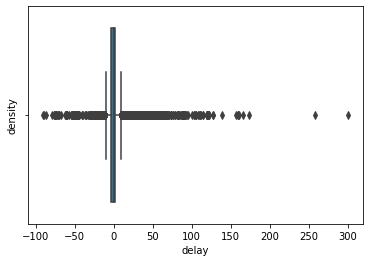

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=data['delay'])
plt.ylabel("density")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


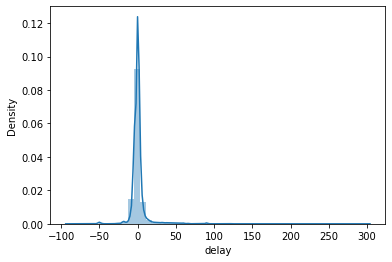

In [ ]:
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant , hence  
sns.distplot(data['delay'])

In [ ]:
# Many hit and trials later, we were able to find the Q3 value to successfully point out the outliers
Q1 = np.percentile(data['delay'], 1.7 )  
Q2 = np.percentile(data['delay'], 50)  
Q3 = np.percentile(data['delay'], 99.3)

print('Q1 1.1 percentile of the given data is, ', Q1) 
print('Q2 50 percentile of the given data is, ', Q2) 
print('Q3 99.4 percentile of the given data is, ', Q3)

Q1 1.1 percentile of the given data is,  -12.0
Q2 50 percentile of the given data is,  0.0
Q3 99.4 percentile of the given data is,  56.0


In [ ]:
IQR = Q3 - Q1  
print('Interquartile range is', IQR)

Interquartile range is 68.0


In [ ]:
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('low_limit is', low_lim) 
print('up_limit is', up_lim)

low_limit is -114.0
up_limit is 158.0


In [ ]:
outlier =[] 
for x in data['delay']: 
    if ((x> up_lim) or (x<low_lim)): 
         outlier.append(x) 
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [300, 258, 174, 166, 161, 159, 159, 159]


In [ ]:
# remove outliers in delay 
data.drop(data[data['delay']>up_lim].index,index=None,inplace=True)

In [ ]:
data.shape

(39863, 14)

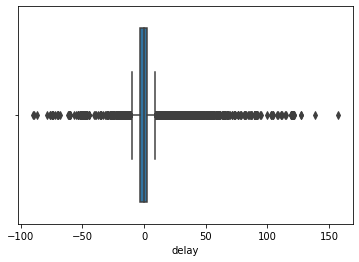

In [ ]:
sns.boxplot(x=data['delay'])

## **Train Test and Validation Split**

In [ ]:
# splitting the dataset of 40,000 rows into training, testing and Validation sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.drop(['clear_date','delay'],axis=1),data['delay'],test_size=0.2,shuffle=False)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.25,shuffle=False) # 0.25 x 0.8 = 0.2

In [ ]:
x_train.shape , x_test.shape, x_val.shape

((23917, 12), (7973, 12), (7973, 12))

In [ ]:
y_train.shape , y_test.shape, y_val.shape

((23917,), (7973,), (7973,))

## **EDA**

In [ ]:
x_train.describe()

,buisness_year,doc_id,total_open_amount,invoice_id
count,23917.0,2.391700e+04,23917.000000,2.391700e+04
mean,2019.0,2.013732e+09,31005.332722,2.013732e+09
std,0.0,2.808874e+08,37966.663772,2.808874e+08
min,2019.0,1.928513e+09,2.760000,1.928513e+09
25%,2019.0,1.928940e+09,4344.550000,1.928940e+09
50%,2019.0,1.929318e+09,16708.610000,1.929318e+09
75%,2019.0,1.929645e+09,45556.160000,1.929645e+09
max,2019.0,2.960577e+09,816385.810000,2.960577e+09


In [ ]:
x_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
37760,U001,0200769623,WAL-MAR in,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,33810.3200,2018-12-30,NAH4,1.928540e+09
41256,U001,0200769623,WAL-MAR corp,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,51583.1600,2018-12-30,NAH4,1.928539e+09
18049,U001,0200769623,WAL-MAR us,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,57924.5500,2018-12-30,NAH4,1.928541e+09
41599,U001,0200769623,WAL-MAR systems,2019.0,1.928531e+09,2018-12-30,2018-12-30,2019-01-14,1839.5300,2018-12-30,NAH4,1.928531e+09
15023,CA02,0140106408,WAL-M systems,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,57166.5357,2018-12-30,CA10,2.960520e+09


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


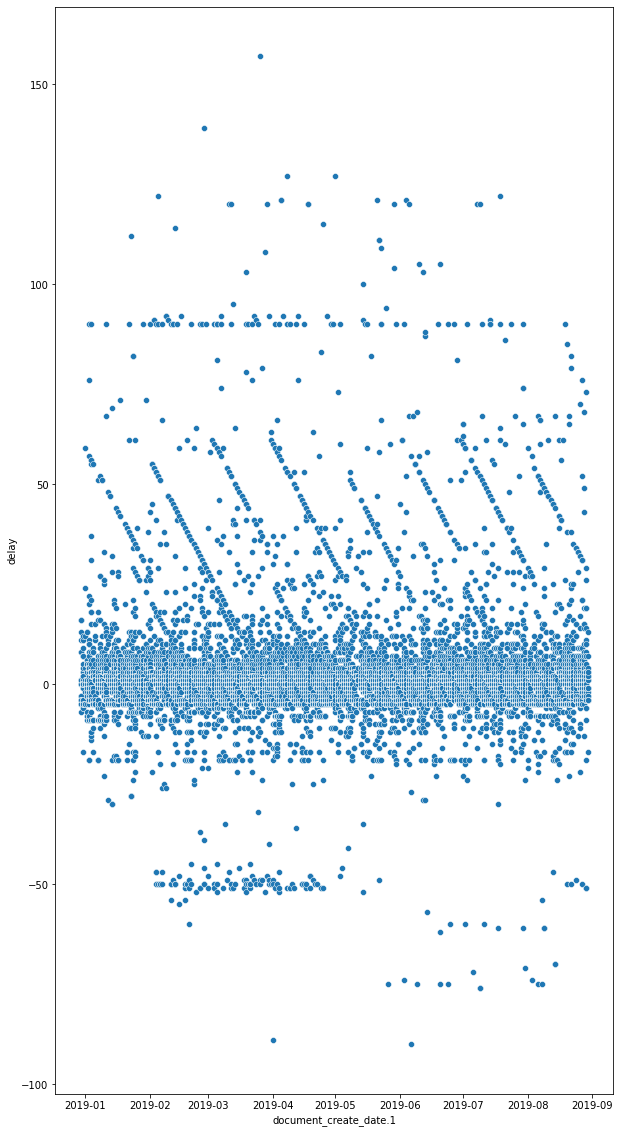

In [ ]:
plt.figure(figsize=(10,20))
sns.scatterplot(x_train['document_create_date.1'],y_train)

### Creating mean_delay columns

In [ ]:
x_train['delay']=pd.DataFrame(y_train,x_train.index)
map_cust_num=x_train.groupby("cust_number")['delay'].mean().to_dict()

x_train['mean_delay']=x_train['cust_number'].map(map_cust_num)

In [ ]:
x_val['mean_delay']=x_val['cust_number'].map(map_cust_num)
x_val['mean_delay'][x_val['mean_delay'].isnull()]= x_train['delay'].mean()

x_test['mean_delay']=x_test['cust_number'].map(map_cust_num)
x_test['mean_delay'][x_test['mean_delay'].isnull()]= x_train['delay'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
clear_date_null['mean_delay']=clear_date_null['cust_number'].map(map_cust_num)
clear_date_null['mean_delay'][clear_date_null['mean_delay'].isnull()]= x_train['delay'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x_train['delay'].mean()

1.1038591796630013

In [ ]:
x_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,mean_delay
37760,U001,0200769623,WAL-MAR in,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,33810.3200,2018-12-30,NAH4,1.928540e+09,-5,-1.893127
41256,U001,0200769623,WAL-MAR corp,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,51583.1600,2018-12-30,NAH4,1.928539e+09,-5,-1.893127
18049,U001,0200769623,WAL-MAR us,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,57924.5500,2018-12-30,NAH4,1.928541e+09,-4,-1.893127
41599,U001,0200769623,WAL-MAR systems,2019.0,1.928531e+09,2018-12-30,2018-12-30,2019-01-14,1839.5300,2018-12-30,NAH4,1.928531e+09,1,-1.893127
15023,CA02,0140106408,WAL-M systems,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,57166.5357,2018-12-30,CA10,2.960520e+09,16,9.420168


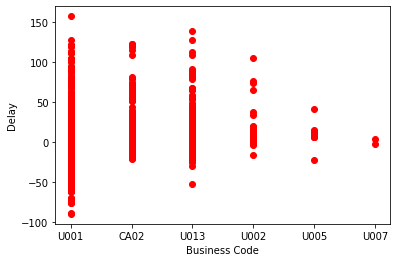

In [ ]:
plt.scatter(x_train['business_code'] , y_train, color='red')
plt.xlabel('Business Code')
plt.ylabel('Delay')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


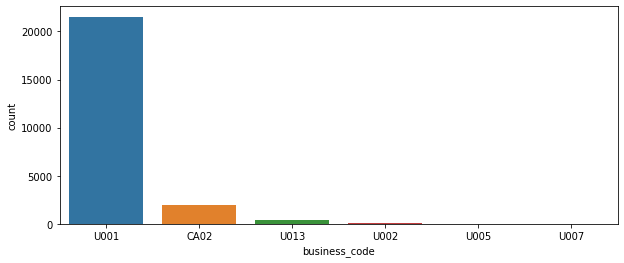

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x_train['business_code'], order = x_train['business_code'].value_counts().index);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


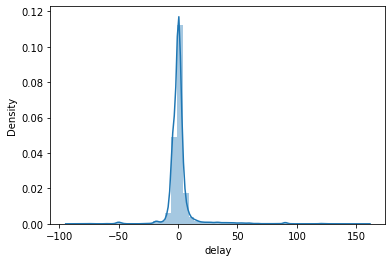

In [ ]:
sns.distplot(y_train)

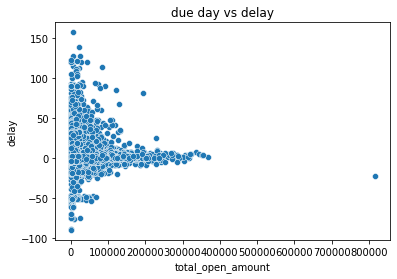

In [ ]:
plt.title("due day vs delay".format(x_train['total_open_amount'],y_train))
sns.scatterplot(x=x_train['total_open_amount'],y=y_train)

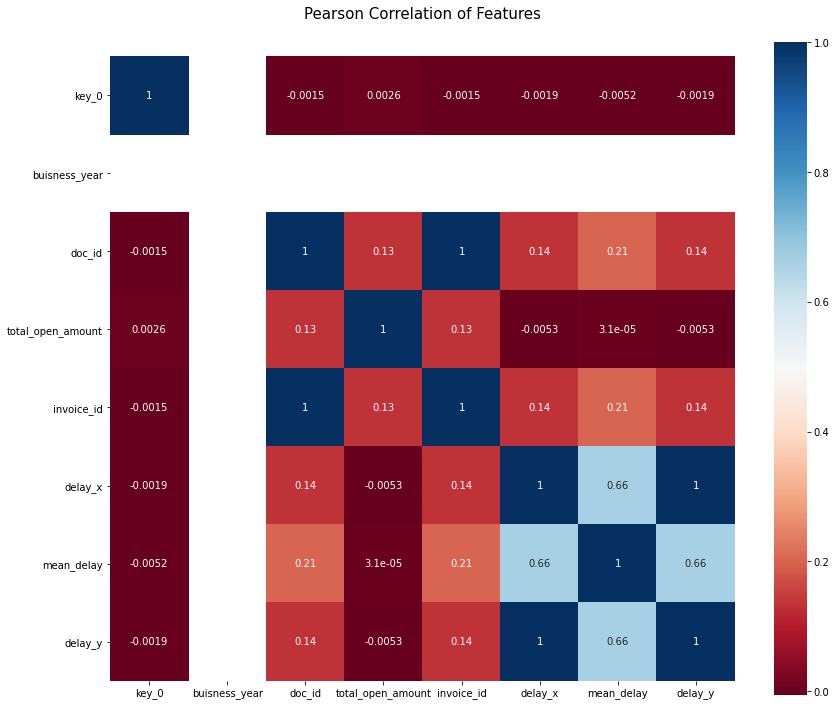

In [ ]:
colormap=plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title("Pearson Correlation of Features",y=1.05,size=15)
sns.heatmap(x_train.merge(y_train,on=x_train.index).corr(),vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

**We can see that correlation between invoice id and doc id is 1 so we can drop either of them**

## **Feature Enigneering**

### We can make features from due date

In [ ]:
x_train['due_dt_week']=pd.to_datetime(x_train['due_in_date']).dt.week
x_train['due_dt_mon']=pd.to_datetime(x_train['due_in_date']).dt.month
x_train['due_dt_day_of_week']=pd.to_datetime(x_train['due_in_date']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
x_train['due_dt_day']=pd.to_datetime(x_train['due_in_date']).dt.day

### Some changes in test set and validation set, separating day of week, week and month to keep everything in int

In [ ]:
x_test['due_dt_week']=pd.to_datetime(x_test['due_in_date']).dt.week
x_test['due_dt_mon']=pd.to_datetime(x_test['due_in_date']).dt.month
x_test['due_dt_day_of_week']=pd.to_datetime(x_test['due_in_date']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
# same feature building for test set
x_val['due_dt_week']=pd.to_datetime(x_val['due_in_date']).dt.week
x_val['due_dt_mon']=pd.to_datetime(x_val['due_in_date']).dt.month
x_val['due_dt_day_of_week']=pd.to_datetime(x_val['due_in_date']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
x_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,due_dt_day
37760,U001,0200769623,WAL-MAR in,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,33810.3200,2018-12-30,NAH4,1.928540e+09,-5,-1.893127,3,1,0,14
41256,U001,0200769623,WAL-MAR corp,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,51583.1600,2018-12-30,NAH4,1.928539e+09,-5,-1.893127,3,1,0,14
18049,U001,0200769623,WAL-MAR us,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,57924.5500,2018-12-30,NAH4,1.928541e+09,-4,-1.893127,3,1,0,14
41599,U001,0200769623,WAL-MAR systems,2019.0,1.928531e+09,2018-12-30,2018-12-30,2019-01-14,1839.5300,2018-12-30,NAH4,1.928531e+09,1,-1.893127,3,1,0,14
15023,CA02,0140106408,WAL-M systems,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,57166.5357,2018-12-30,CA10,2.960520e+09,16,9.420168,2,1,2,9


In [ ]:
clear_date_null['due_dt_week']=pd.to_datetime(clear_date_null['due_in_date']).dt.week
clear_date_null['due_dt_mon']=pd.to_datetime(clear_date_null['due_in_date']).dt.month
clear_date_null['due_dt_day_of_week']=pd.to_datetime(clear_date_null['due_in_date']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
clear_date_null.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week
2,U001,0200744019,TARG llc,2020.0,1.930708e+09,2020-03-27,2020-03-27,2020-04-11,USD,RV,1.0,7664.54,2020-03-27,NAA8,1.930708e+09,1,3.863309,15,4,5
3,U001,0200705089,JETR llc,2020.0,1.930788e+09,2020-04-15,2020-04-15,2020-04-30,USD,RV,1.0,19509.74,2020-04-15,NAA8,1.930788e+09,1,1.348837,18,4,3
7,U001,0200793513,KROGER associates,2020.0,1.930779e+09,2020-04-12,2020-04-12,2020-04-27,USD,RV,1.0,28910.14,2020-04-12,NAA8,1.930779e+09,1,0.795918,18,4,0
10,U001,0200020431,DEC systems,2020.0,1.930600e+09,2020-03-04,2020-03-04,2020-03-08,USD,RV,1.0,4408.13,2020-03-01,NAM1,1.930600e+09,1,-5.042857,10,3,6
16,U001,0200769623,WAL-MAR us,2020.0,1.930714e+09,2020-03-28,2020-03-28,2020-04-12,USD,RV,1.0,13155.10,2020-03-28,NAH4,1.930714e+09,1,-1.893127,15,4,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'due weekday vs delay')

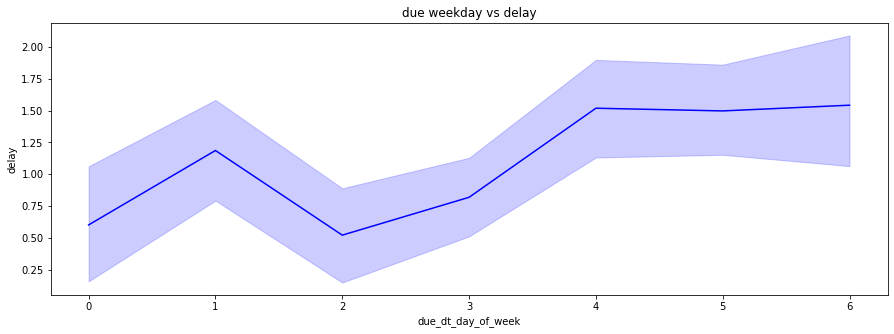

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x_train['due_dt_day_of_week'],y_train,color='blue')
plt.title('due weekday vs delay')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


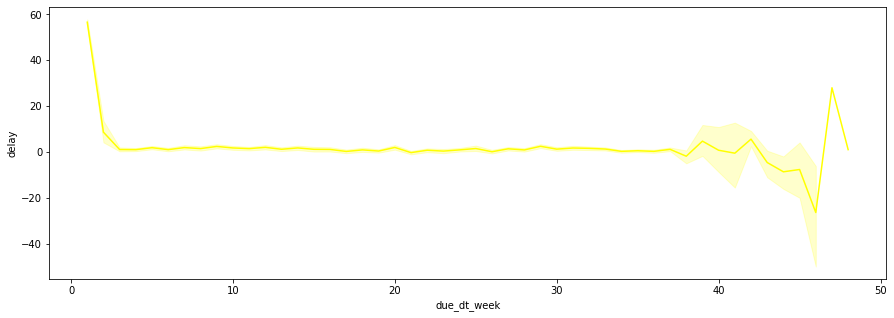

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x_train['due_dt_week'],y_train,color='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


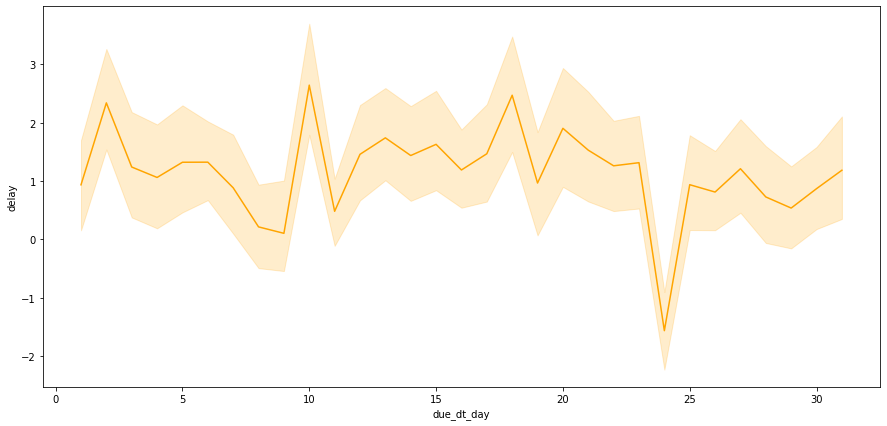

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(x_train['due_dt_day'],y_train,data=x_train,color='orange')

In [ ]:
#dropping due_dt_day as it has no significance on delay
x_train.drop('due_dt_day', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


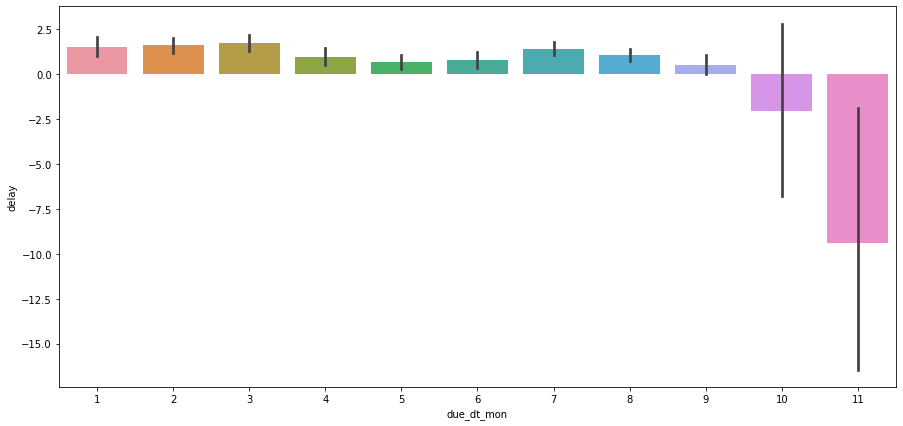

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x_train['due_dt_mon'],y_train,data=x_train)

In [ ]:
x_train['due_dt_day_of_week'].unique()

array([0, 2, 1, 3, 4, 5, 6])

In [ ]:
x_train['is_weekend']=np.where(x_train['due_dt_day_of_week']>3,1,0)
x_val['is_weekend']=np.where(x_val['due_dt_day_of_week']>3,1,0)
x_test['is_weekend']=np.where(x_test['due_dt_day_of_week']>3,1,0)

### Normalising total_open_amount by taking log

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


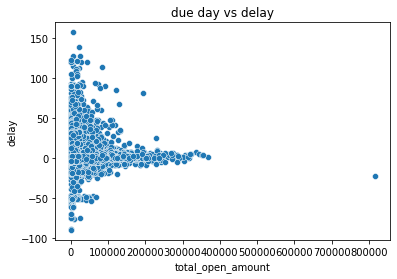

In [ ]:
plt.title("due day vs delay".format(x_train['total_open_amount'],y_train))
sns.scatterplot(x_train['total_open_amount'],y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


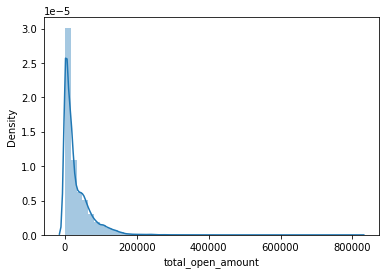

In [ ]:

sns.distplot(x_train['total_open_amount'])

In [ ]:
x_train['total_open_amount'].describe()

count     23917.000000
mean      31005.332722
std       37966.663772
min           2.760000
25%        4344.550000
50%       16708.610000
75%       45556.160000
max      816385.810000
Name: total_open_amount, dtype: float64

In [ ]:
# the total_open_amount has high values and if i give these values to for comparision the computer will assign high priority to total open amount
# that too when it does not deserve it and in the end give wrong prediction
# so it is important to scale the values before giving the dataset for feature selection

x_train['amnt_log']=np.log(x_train['total_open_amount'])
x_train["amnt_log"].describe()

count    23917.000000
mean         9.355909
std          1.789300
min          1.015231
25%          8.376677
50%          9.723679
75%         10.726701
max         13.612642
Name: amnt_log, dtype: float64

In [ ]:
x_test['amnt_log']=np.log(x_test['total_open_amount'])
x_val['amnt_log']=np.log(x_val['total_open_amount'])
clear_date_null['amnt_log']=np.log(clear_date_null['total_open_amount'])
clear_date_null['amnt_log'].describe()

count    10000.000000
mean         9.503634
std          1.739321
min          0.157004
25%          8.654243
50%          9.847612
75%         10.798385
max         13.639678
Name: amnt_log, dtype: float64

In [ ]:
x_val['amnt_log'].describe()

count    7973.000000
mean        9.443319
std         1.738055
min         2.282382
25%         8.519931
50%         9.775826
75%        10.763683
max        12.625466
Name: amnt_log, dtype: float64

In [ ]:
x_test['amnt_log'].describe()

count    7973.000000
mean        9.413862
std         1.787213
min         1.043804
25%         8.480079
50%         9.778533
75%        10.757873
max        12.840430
Name: amnt_log, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


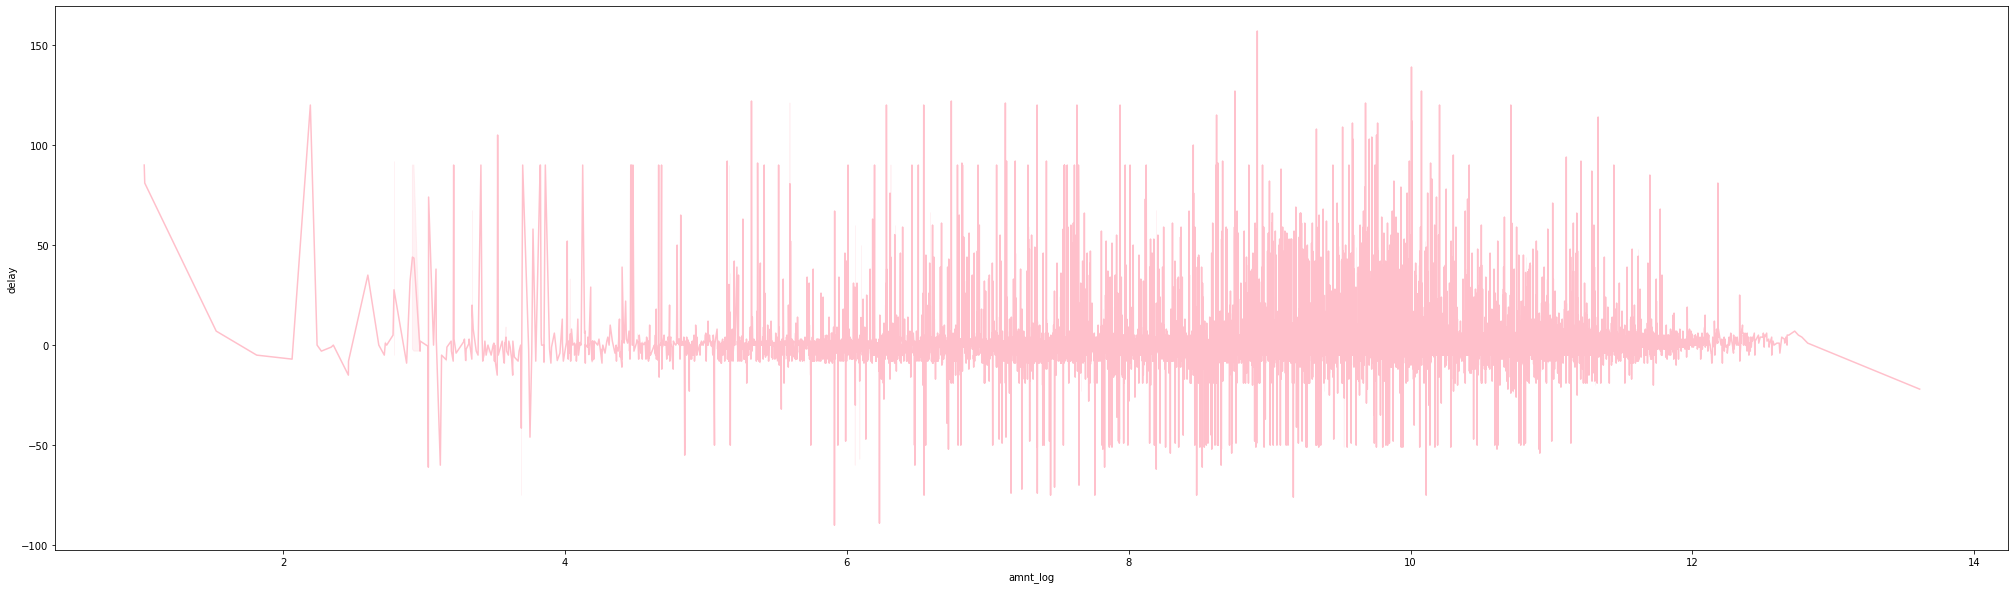

In [ ]:

plt.figure(figsize=(35,10))
sns.lineplot(x_train['amnt_log'],y_train,color='pink')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'X_train amount log')

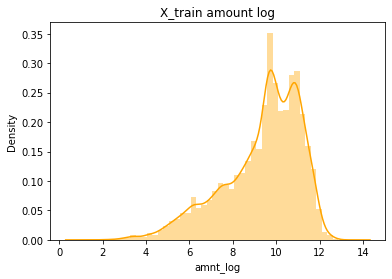

In [ ]:

sns.distplot(x_train['amnt_log'],color='orange')
plt.title("X_train amount log")

# this graphs makes more sense than the previous high skewed one.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'clear_date_null amount log')

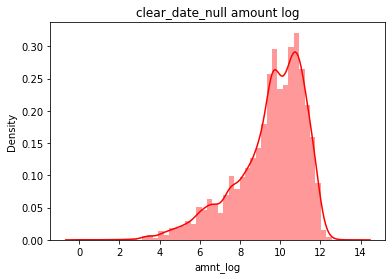

In [ ]:
sns.distplot(clear_date_null['amnt_log'],color='red')
plt.title("clear_date_null amount log")

### Preparing cust_payment_terms for feature selection

In [ ]:
x_train['cust_payment_terms'].value_counts()

NAA8    9499
NAH4    6333
CA10    1877
NAC6     819
NAM4     592
        ... 
CA60       1
NABD       1
NATK       1
NAV2       1
B052       1
Name: cust_payment_terms, Length: 61, dtype: int64

In [ ]:
#since there are many values with have occurance 1 or low values and if we try to find mean of their occurance then it would be negligible wrt to NAA8 and the others 
# so I am grouping them in a list and later will replace those values with a common one called others

fem=[xdd for xdd in x_train['cust_payment_terms'] if xdd not in ['NAA8','NAH4','CA10','NAC6','NAM4','NAAX']]
fem_val=[xdd1 for xdd1 in x_val['cust_payment_terms'] if xdd1 not in ['NAA8','NAH4','CA10','NAC6','NAM4','NAAX']]
fem_test1=[xdd2 for xdd2 in x_test['cust_payment_terms'] if xdd2 not in ['NAA8','NAH4','CA10','NAC6','NAM4','NAAX']]

In [ ]:
fem_null=[xdd3 for xdd3 in clear_date_null['cust_payment_terms'] if xdd3 not in ['NAA8','NAH4','CA10','NAC6','NAM4','NAAX']]

In [ ]:

#replacing the list elements with others
x_train['cust_payment_terms'] = x_train['cust_payment_terms'].replace(fem,'others')
x_val['cust_payment_terms'] = x_val['cust_payment_terms'].replace(fem_val,'others')
x_test['cust_payment_terms'] = x_test['cust_payment_terms'].replace(fem_test1,'others')

In [ ]:
clear_date_null['cust_payment_terms'] = clear_date_null['cust_payment_terms'].replace(fem_null,'others')

In [ ]:
x_train['cust_payment_terms'].value_counts()
#this reduces the total unique values and we can make a feature out of them.

NAA8      9499
NAH4      6333
others    4217
CA10      1877
NAC6       819
NAM4       592
NAAX       580
Name: cust_payment_terms, dtype: int64

In [ ]:
clear_date_null['cust_payment_terms'].value_counts()

NAA8      4102
NAH4      2927
others    1295
CA10       726
NAC6       414
NAM4       281
NAAX       255
Name: cust_payment_terms, dtype: int64

In [ ]:
clear_date_null['cust_payment_terms'].value_counts(normalize=True)

NAA8      0.4102
NAH4      0.2927
others    0.1295
CA10      0.0726
NAC6      0.0414
NAM4      0.0281
NAAX      0.0255
Name: cust_payment_terms, dtype: float64

In [ ]:
cus_pay_terms={'NAA8':0.401007,'NAH4':0.297426,'CA10':0.078930,'NAC6':0.035143,'NAM4':0.025179,'NAAX':0.024775,'others':0.174988}
cus_pay_terms

#here i made a list where i inserted value name and the mean of their occurance.
#frequency encoding

{'CA10': 0.07893,
 'NAA8': 0.401007,
 'NAAX': 0.024775,
 'NAC6': 0.035143,
 'NAH4': 0.297426,
 'NAM4': 0.025179,
 'others': 0.174988}

In [ ]:
#mapping the list with train,test_val and clear_date_null.

x_train['cust_payment_terms']=x_train['cust_payment_terms'].map(cus_pay_terms)
x_val['cust_payment_terms']=x_val['cust_payment_terms'].map(cus_pay_terms)
x_test['cust_payment_terms']=x_test['cust_payment_terms'].map(cus_pay_terms)
clear_date_null['cust_payment_terms']=clear_date_null['cust_payment_terms'].map(cus_pay_terms)

In [ ]:
x_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
37760,U001,0200769623,WAL-MAR in,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,33810.3200,2018-12-30,0.297426,1.928540e+09,-5,-1.893127,3,1,0,0,10.428521
41256,U001,0200769623,WAL-MAR corp,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,51583.1600,2018-12-30,0.297426,1.928539e+09,-5,-1.893127,3,1,0,0,10.850951
18049,U001,0200769623,WAL-MAR us,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,57924.5500,2018-12-30,0.297426,1.928541e+09,-4,-1.893127,3,1,0,0,10.966897
41599,U001,0200769623,WAL-MAR systems,2019.0,1.928531e+09,2018-12-30,2018-12-30,2019-01-14,1839.5300,2018-12-30,0.297426,1.928531e+09,1,-1.893127,3,1,0,0,7.517265
15023,CA02,0140106408,WAL-M systems,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,57166.5357,2018-12-30,0.078930,2.960520e+09,16,9.420168,2,1,2,0,10.953724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39573,U001,0200769623,WAL-MAR llc,2019.0,1.929808e+09,2019-08-30,2019-08-30,2019-09-14,14127.2900,2019-08-30,0.297426,1.929808e+09,-4,-1.893127,37,9,5,1,9.555864
41165,U001,0200769623,WAL-MAR in,2019.0,1.929807e+09,2019-08-30,2019-08-30,2019-09-14,15521.0600,2019-08-30,0.297426,1.929807e+09,-4,-1.893127,37,9,5,1,9.649953
5213,U001,0200769623,WAL-MAR us,2019.0,1.929812e+09,2019-08-30,2019-08-30,2019-09-14,39806.0600,2019-08-30,0.297426,1.929812e+09,-1,-1.893127,37,9,5,1,10.591774
26151,U001,0200769623,WAL-MAR in,2019.0,1.929813e+09,2019-08-30,2019-08-30,2019-09-14,943.1200,2019-08-30,0.297426,1.929813e+09,-4,-1.893127,37,9,5,1,6.849194


### Preparing business_code for feature selection

In [ ]:
x_train['business_code'].value_counts()

U001    21525
CA02     1933
U013      365
U002       79
U005       13
U007        2
Name: business_code, dtype: int64

In [ ]:
#normalize return proportion 
x_train['business_code'].value_counts(normalize=True)

U001    0.899987
CA02    0.080821
U013    0.015261
U002    0.003303
U005    0.000544
U007    0.000084
Name: business_code, dtype: float64

In [ ]:
x_train['business_code'] = x_train['business_code'].replace(['U002','U005','U007','U013'],'others')

x_val['business_code'] = x_val['business_code'].replace(['U002','U005','U007','U013'],'others')

x_test['business_code'] = x_test['business_code'].replace(['U002','U005','U007','U013'],'others')

In [ ]:
clear_date_null['business_code'] = clear_date_null['business_code'].replace(['U002','U005','U007','U013'],'others')

In [ ]:
x_train['business_code'].value_counts(normalize=True)

U001      0.899987
CA02      0.080821
others    0.019191
Name: business_code, dtype: float64

In [ ]:

#dictionary which can be used for mapping which will reduce labour.
buss_code={'U001':0.900517,
'CA02':0.081116,
'others':0.018367
}


In [ ]:
x_train['business_code']=x_train['business_code'].map(buss_code)
x_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
37760,0.900517,0200769623,WAL-MAR in,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,33810.3200,2018-12-30,0.297426,1.928540e+09,-5,-1.893127,3,1,0,0,10.428521
41256,0.900517,0200769623,WAL-MAR corp,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,51583.1600,2018-12-30,0.297426,1.928539e+09,-5,-1.893127,3,1,0,0,10.850951
18049,0.900517,0200769623,WAL-MAR us,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,57924.5500,2018-12-30,0.297426,1.928541e+09,-4,-1.893127,3,1,0,0,10.966897
41599,0.900517,0200769623,WAL-MAR systems,2019.0,1.928531e+09,2018-12-30,2018-12-30,2019-01-14,1839.5300,2018-12-30,0.297426,1.928531e+09,1,-1.893127,3,1,0,0,7.517265
15023,0.081116,0140106408,WAL-M systems,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,57166.5357,2018-12-30,0.078930,2.960520e+09,16,9.420168,2,1,2,0,10.953724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39573,0.900517,0200769623,WAL-MAR llc,2019.0,1.929808e+09,2019-08-30,2019-08-30,2019-09-14,14127.2900,2019-08-30,0.297426,1.929808e+09,-4,-1.893127,37,9,5,1,9.555864
41165,0.900517,0200769623,WAL-MAR in,2019.0,1.929807e+09,2019-08-30,2019-08-30,2019-09-14,15521.0600,2019-08-30,0.297426,1.929807e+09,-4,-1.893127,37,9,5,1,9.649953
5213,0.900517,0200769623,WAL-MAR us,2019.0,1.929812e+09,2019-08-30,2019-08-30,2019-09-14,39806.0600,2019-08-30,0.297426,1.929812e+09,-1,-1.893127,37,9,5,1,10.591774
26151,0.900517,0200769623,WAL-MAR in,2019.0,1.929813e+09,2019-08-30,2019-08-30,2019-09-14,943.1200,2019-08-30,0.297426,1.929813e+09,-4,-1.893127,37,9,5,1,6.849194


In [ ]:
clear_date_null['business_code']=clear_date_null['business_code'].map(buss_code)
x_test['business_code']=x_test['business_code'].map(buss_code)
x_val['business_code']=x_val['business_code'].map(buss_code)

In [ ]:
x_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
37760,0.900517,0200769623,WAL-MAR in,2019.0,1.928540e+09,2018-12-30,2018-12-30,2019-01-14,33810.3200,2018-12-30,0.297426,1.928540e+09,-5,-1.893127,3,1,0,0,10.428521
41256,0.900517,0200769623,WAL-MAR corp,2019.0,1.928539e+09,2018-12-30,2018-12-30,2019-01-14,51583.1600,2018-12-30,0.297426,1.928539e+09,-5,-1.893127,3,1,0,0,10.850951
18049,0.900517,0200769623,WAL-MAR us,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,57924.5500,2018-12-30,0.297426,1.928541e+09,-4,-1.893127,3,1,0,0,10.966897
41599,0.900517,0200769623,WAL-MAR systems,2019.0,1.928531e+09,2018-12-30,2018-12-30,2019-01-14,1839.5300,2018-12-30,0.297426,1.928531e+09,1,-1.893127,3,1,0,0,7.517265
15023,0.081116,0140106408,WAL-M systems,2019.0,2.960520e+09,2018-12-30,2018-12-30,2019-01-09,57166.5357,2018-12-30,0.078930,2.960520e+09,16,9.420168,2,1,2,0,10.953724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39573,0.900517,0200769623,WAL-MAR llc,2019.0,1.929808e+09,2019-08-30,2019-08-30,2019-09-14,14127.2900,2019-08-30,0.297426,1.929808e+09,-4,-1.893127,37,9,5,1,9.555864
41165,0.900517,0200769623,WAL-MAR in,2019.0,1.929807e+09,2019-08-30,2019-08-30,2019-09-14,15521.0600,2019-08-30,0.297426,1.929807e+09,-4,-1.893127,37,9,5,1,9.649953
5213,0.900517,0200769623,WAL-MAR us,2019.0,1.929812e+09,2019-08-30,2019-08-30,2019-09-14,39806.0600,2019-08-30,0.297426,1.929812e+09,-1,-1.893127,37,9,5,1,10.591774
26151,0.900517,0200769623,WAL-MAR in,2019.0,1.929813e+09,2019-08-30,2019-08-30,2019-09-14,943.1200,2019-08-30,0.297426,1.929813e+09,-4,-1.893127,37,9,5,1,6.849194


### Dropping unncessary columns

In [ ]:
x_train.drop("cust_number",axis=1,inplace=True)
x_val.drop("cust_number",axis=1,inplace=True)
x_test.drop("cust_number",axis=1,inplace=True)
clear_date_null.drop("cust_number",axis=1,inplace=True)

In [ ]:
x_train.drop(['posting_date'],axis=1,inplace=True)
x_test.drop(['posting_date'],axis=1,inplace=True)
x_val.drop(['posting_date'],axis=1,inplace=True)

In [ ]:
x_train.drop(['name_customer'],axis=1,inplace=True)
x_test.drop(['name_customer'],axis=1,inplace=True)
x_val.drop(['name_customer'],axis=1,inplace=True)

In [ ]:
x_train.drop(['buisness_year'],axis=1,inplace=True)
x_test.drop(['buisness_year'],axis=1,inplace=True)
x_val.drop(['buisness_year'],axis=1,inplace=True)

In [ ]:
x_train.drop(['document_create_date.1'],axis=1,inplace=True)
x_test.drop(['document_create_date.1'],axis=1,inplace=True)
x_val.drop(['document_create_date.1'],axis=1,inplace=True)

In [ ]:
x_train.drop(['due_in_date'],axis=1,inplace=True)
x_test.drop(['due_in_date'],axis=1,inplace=True)
x_val.drop(['due_in_date'],axis=1,inplace=True)

In [ ]:
x_train.drop(['total_open_amount'],axis=1,inplace=True)
x_test.drop(['total_open_amount'],axis=1,inplace=True)
x_val.drop(['total_open_amount'],axis=1,inplace=True)

In [ ]:
x_train.drop(['baseline_create_date'],axis=1,inplace=True)
x_test.drop(['baseline_create_date'],axis=1,inplace=True)
x_val.drop(['baseline_create_date'],axis=1,inplace=True)

In [ ]:
x_train.drop(['invoice_id'],axis=1,inplace=True)
x_test.drop(['invoice_id'],axis=1,inplace=True)
x_val.drop(['invoice_id'],axis=1,inplace=True)

In [ ]:
x_train.drop(['doc_id'],axis=1,inplace=True)
x_test.drop(['doc_id'],axis=1,inplace=True)
x_val.drop(['doc_id'],axis=1,inplace=True)

In [ ]:
x_train.drop(['delay'],axis=1,inplace=True)

In [ ]:
clear_date_null.drop(['doc_id', 'invoice_id', 'document_create_date.1','due_in_date', 'invoice_currency', 'buisness_year'],axis=1,inplace=True)

In [ ]:
clear_date_null.drop(['total_open_amount', 'baseline_create_date', 'document type', 'isOpen'],axis=1,inplace=True)

In [ ]:
clear_date_null.drop(['name_customer'],axis=1,inplace=True)

In [ ]:

x_train['is_weekend']=np.where(x_train['due_dt_day_of_week']>3,1,0)
x_val['is_weekend']=np.where(x_val['due_dt_day_of_week']>3,1,0)
x_test['is_weekend']=np.where(x_test['due_dt_day_of_week']>3,1,0)
clear_date_null['is_weekend']=np.where(clear_date_null['due_dt_day_of_week']>3,1,0)

In [ ]:
x_train.head()

,business_code,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
37760,0.900517,0.297426,-1.893127,3,1,0,0,10.428521
41256,0.900517,0.297426,-1.893127,3,1,0,0,10.850951
18049,0.900517,0.297426,-1.893127,3,1,0,0,10.966897
41599,0.900517,0.297426,-1.893127,3,1,0,0,7.517265
15023,0.081116,0.078930,9.420168,2,1,2,0,10.953724


In [ ]:
clear_date_null.drop(['posting_date'],axis=1,inplace=True)

In [ ]:
clear_date_null.drop(['posting_id'],axis=1,inplace=True)

In [ ]:
clear_date_null.head()

,business_code,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,amnt_log,is_weekend
2,0.900517,0.401007,3.863309,15,4,5,8.944360,1
3,0.900517,0.401007,1.348837,18,4,3,9.878669,0
7,0.900517,0.401007,0.795918,18,4,0,10.271948,0
10,0.900517,0.174988,-5.042857,10,3,6,8.391206,1
16,0.900517,0.297426,-1.893127,15,4,6,9.484565,1


In [ ]:
clear_date_null.shape

(10000, 8)

In [ ]:
x_train.shape

(23917, 8)

In [ ]:
x_train

,business_code,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
37760,0.900517,0.297426,-1.893127,3,1,0,0,10.428521
41256,0.900517,0.297426,-1.893127,3,1,0,0,10.850951
18049,0.900517,0.297426,-1.893127,3,1,0,0,10.966897
41599,0.900517,0.297426,-1.893127,3,1,0,0,7.517265
15023,0.081116,0.078930,9.420168,2,1,2,0,10.953724
...,...,...,...,...,...,...,...,...
39573,0.900517,0.297426,-1.893127,37,9,5,1,9.555864
41165,0.900517,0.297426,-1.893127,37,9,5,1,9.649953
5213,0.900517,0.297426,-1.893127,37,9,5,1,10.591774
26151,0.900517,0.297426,-1.893127,37,9,5,1,6.849194


In [ ]:
x_test

,business_code,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
47753,0.900517,0.401007,0.187500,49,12,3,0,9.945226
1771,0.900517,0.297426,-1.893127,49,12,3,0,10.236402
992,0.900517,0.297426,-1.893127,49,12,3,0,6.988616
44234,0.900517,0.401007,1.600000,49,12,3,0,10.924308
422,0.900517,0.297426,-1.893127,49,12,3,0,9.990913
...,...,...,...,...,...,...,...,...
16221,0.081116,0.078930,5.876190,12,3,0,0,6.661138
21835,0.900517,0.024775,-1.204868,11,3,4,1,9.081721
29213,0.900517,0.401007,5.550000,11,3,4,1,10.693379
6084,0.900517,0.174988,2.437500,18,5,5,1,9.284590


In [ ]:
x_val

,business_code,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
46281,0.018367,0.174988,3.428571,39,9,6,1,10.545809
26158,0.900517,0.297426,1.131810,37,9,5,1,9.590469
4433,0.900517,0.174988,1.433333,44,11,6,1,11.102455
38483,0.900517,0.174988,0.524752,40,10,1,0,10.124742
21889,0.018367,0.174988,3.428571,39,9,6,1,11.076697
...,...,...,...,...,...,...,...,...
18946,0.900517,0.035143,0.373512,49,12,3,0,11.236848
10602,0.900517,0.297426,-1.893127,49,12,3,0,9.639956
22262,0.081116,0.078930,2.895833,49,12,0,0,8.991834
35159,0.900517,0.401007,-0.083333,49,12,3,0,9.300198


In [ ]:
clear_date_null

,business_code,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,amnt_log,is_weekend
2,0.900517,0.401007,3.863309,15,4,5,8.944360,1
3,0.900517,0.401007,1.348837,18,4,3,9.878669,0
7,0.900517,0.401007,0.795918,18,4,0,10.271948,0
10,0.900517,0.174988,-5.042857,10,3,6,8.391206,1
16,0.900517,0.297426,-1.893127,15,4,6,9.484565,1
...,...,...,...,...,...,...,...,...
49961,0.900517,0.297426,-2.072488,21,5,5,8.695423,1
49976,0.900517,0.401007,0.125000,19,5,5,11.438725,1
49978,0.900517,0.401007,-4.550296,16,4,0,9.541882,0
49979,0.900517,0.401007,0.285714,22,5,5,9.862871,1


In [ ]:
copy = clear_date_null['amnt_log']

In [ ]:
# to fix the order of column in each set

def swap_columns(df, c1, c2):
    df['temp'] = df[c1]
    df[c1] = df[c2]
    df[c2] = df['temp']
    df.drop(columns=['temp'], inplace=True)

In [ ]:
swap_columns(clear_date_null,'amnt_log', 'is_weekend' )

In [ ]:
clear_date_null.rename(columns={"amnt_log":"temp"},inplace=True)

In [ ]:
clear_date_null.rename(columns={"is_weekend":"amnt_log"},inplace=True)

In [ ]:
clear_date_null.rename(columns={"temp":"is_weekend"},inplace=True)

In [ ]:
x_train.columns , x_test.columns , x_val.columns , clear_date_null.columns

(Index(['business_code', 'cust_payment_terms', 'mean_delay', 'due_dt_week',
        'due_dt_mon', 'due_dt_day_of_week', 'is_weekend', 'amnt_log'],
       dtype='object'),
 Index(['business_code', 'cust_payment_terms', 'mean_delay', 'due_dt_week',
        'due_dt_mon', 'due_dt_day_of_week', 'is_weekend', 'amnt_log'],
       dtype='object'),
 Index(['business_code', 'cust_payment_terms', 'mean_delay', 'due_dt_week',
        'due_dt_mon', 'due_dt_day_of_week', 'is_weekend', 'amnt_log'],
       dtype='object'),
 Index(['business_code', 'cust_payment_terms', 'mean_delay', 'due_dt_week',
        'due_dt_mon', 'due_dt_day_of_week', 'is_weekend', 'amnt_log'],
       dtype='object'))

In [ ]:
clear_date_null

,business_code,cust_payment_terms,mean_delay,due_dt_week,due_dt_mon,due_dt_day_of_week,is_weekend,amnt_log
2,0.900517,0.401007,3.863309,15,4,5,1,8.944360
3,0.900517,0.401007,1.348837,18,4,3,0,9.878669
7,0.900517,0.401007,0.795918,18,4,0,0,10.271948
10,0.900517,0.174988,-5.042857,10,3,6,1,8.391206
16,0.900517,0.297426,-1.893127,15,4,6,1,9.484565
...,...,...,...,...,...,...,...,...
49961,0.900517,0.297426,-2.072488,21,5,5,1,8.695423
49976,0.900517,0.401007,0.125000,19,5,5,1,11.438725
49978,0.900517,0.401007,-4.550296,16,4,0,0,9.541882
49979,0.900517,0.401007,0.285714,22,5,5,1,9.862871


In [ ]:
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7973 entries, 46281 to 42926
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_code       7973 non-null   float64
 1   cust_payment_terms  7973 non-null   float64
 2   mean_delay          7973 non-null   float64
 3   due_dt_week         7973 non-null   int64  
 4   due_dt_mon          7973 non-null   int64  
 5   due_dt_day_of_week  7973 non-null   int64  
 6   is_weekend          7973 non-null   int64  
 7   amnt_log            7973 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 560.6 KB


# **Model Building and Prediction**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Linear Regression

In [ ]:
# for x_val

clf = LinearRegression()
clf.fit(x_train, y_train)

# Predicting the Validation Set Results
predicted = np.floor(clf.predict(x_val))

print(predicted)

[ 3.  0.  0. ...  1. -1.  0.]


In [ ]:
y_val

46281   -2
26158    2
4433     1
38483    1
21889   -2
        ..
18946    0
10602   -3
22262    3
35159    0
42926    0
Name: delay, Length: 7973, dtype: int64

#### Finding MAE and RMSE

In [ ]:
mae=mean_absolute_error(y_val,predicted)
print(mae)

3.1705756929637525


In [ ]:
rmse=np.sqrt(mean_squared_error(y_val,predicted))
rmse

5.892904746509662

## Predicting on clear_date_null 

In [ ]:
prediction1 = np.floor(clf.predict(clear_date_null))
print(prediction1)

[ 4.  1.  0. ... -5.  0. -2.]


In [ ]:
# adding predicted column in final result
clear_date_null_copy['predicted'] = prediction1


#### Adding Bucket

In [ ]:
def binning (x):
   
    if x <= 15: return "0-15 days"
    elif x <= 30: return "15-30 days"
    elif x <= 45: return "30-45 days"
    elif x <= 60: return "45-60 days"
    else: return "60+ days"

In [ ]:

clear_date_null_copy['age_bin'] =clear_date_null_copy['predicted'].apply(binning)

In [ ]:
clear_date_null_copy['due_in_date'] = pd.to_datetime(clear_date_null_copy['due_in_date'], format='%Y%m%d')

In [ ]:
#here i am converting the predicted days to a datetime datatype so that it can be added to another datetime datatype

clear_date_null_copy['predicted']=pd.to_timedelta(clear_date_null_copy['predicted'], unit='D')
clear_date_null_copy.drop('clear_date',axis=1,inplace=True)

In [ ]:
#adding predicted_clear_date column to final result

clear_date_null_copy['predicted_clear_date']=clear_date_null_copy['due_in_date']+ clear_date_null_copy['predicted']
clear_date_null_copy['predicted_clear_date']=pd.to_datetime(clear_date_null_copy['predicted_clear_date']).dt.date

# **FINAL RESULT**

In [ ]:
clear_date_null_copy

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted,age_bin,predicted_clear_date
2,U001,0200744019,TARG llc,2020.0,1.930708e+09,2020-03-27,20200326,20200327,2020-04-11,USD,RV,1.0,NaN,7664.54,20200327.0,NAA8,1.930708e+09,1,4 days,0-15 days,2020-04-15
3,U001,0200705089,JETR llc,2020.0,1.930788e+09,2020-04-15,20200415,20200415,2020-04-30,USD,RV,1.0,NaN,19509.74,20200415.0,NAA8,1.930788e+09,1,1 days,0-15 days,2020-05-01
7,U001,0200793513,KROGER associates,2020.0,1.930779e+09,2020-04-12,20200412,20200412,2020-04-27,USD,RV,1.0,NaN,28910.14,20200412.0,NAA8,1.930779e+09,1,0 days,0-15 days,2020-04-27
10,U001,0200020431,DEC systems,2020.0,1.930600e+09,2020-03-04,20200304,20200304,2020-03-08,USD,RV,1.0,NaN,4408.13,20200301.0,NAM1,1.930600e+09,1,-5 days,0-15 days,2020-03-03
16,U001,0200769623,WAL-MAR us,2020.0,1.930714e+09,2020-03-28,20200328,20200328,2020-04-12,USD,RV,1.0,NaN,13155.10,20200328.0,NAH4,1.930714e+09,1,-2 days,0-15 days,2020-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49961,U001,200769623,WAL-MAR corp,2020.0,1.930876e+09,2020-05-08,20200507,20200508,2020-05-23,USD,RV,1.0,NaN,5975.50,20200508.0,NAH4,1.930876e+09,1,-2 days,0-15 days,2020-05-21
49976,U001,0200774000,RALEY co,2020.0,1.930824e+09,2020-04-24,20200424,20200424,2020-05-09,USD,RV,1.0,NaN,92848.60,20200424.0,NAA8,1.930824e+09,1,0 days,0-15 days,2020-05-09
49978,U001,0200761734,H E BUT,2020.0,1.930711e+09,2020-03-29,20200328,20200329,2020-04-13,USD,RV,1.0,NaN,13931.14,20200329.0,NAA8,1.930711e+09,1,-5 days,0-15 days,2020-04-08
49979,U001,0200763229,MAINES corporation,2020.0,1.930906e+09,2020-05-15,20200515,20200515,2020-05-30,USD,RV,1.0,NaN,19203.95,20200515.0,NAA8,1.930906e+09,1,0 days,0-15 days,2020-05-30


# Data Preparation For Loading In Database

In [ ]:
db_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2,U001,0200744019,TARG llc,NaN,2020.0,1.930708e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,NaN,7664.54,20200327.0,NAA8,1.930708e+09,1
3,U001,0200705089,JETR llc,NaN,2020.0,1.930788e+09,2020-04-15,20200415,20200415,20200430.0,USD,RV,1.0,NaN,19509.74,20200415.0,NAA8,1.930788e+09,1
7,U001,0200793513,KROGER associates,NaN,2020.0,1.930779e+09,2020-04-12,20200412,20200412,20200427.0,USD,RV,1.0,NaN,28910.14,20200412.0,NAA8,1.930779e+09,1
10,U001,0200020431,DEC systems,NaN,2020.0,1.930600e+09,2020-03-04,20200304,20200304,20200308.0,USD,RV,1.0,NaN,4408.13,20200301.0,NAM1,1.930600e+09,1
16,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930714e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,NaN,13155.10,20200328.0,NAH4,1.930714e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49961,U001,200769623,WAL-MAR corp,NaN,2020.0,1.930876e+09,2020-05-08,20200507,20200508,20200523.0,USD,RV,1.0,NaN,5975.50,20200508.0,NAH4,1.930876e+09,1
49976,U001,0200774000,RALEY co,NaN,2020.0,1.930824e+09,2020-04-24,20200424,20200424,20200509.0,USD,RV,1.0,NaN,92848.60,20200424.0,NAA8,1.930824e+09,1
49978,U001,0200761734,H E BUT,NaN,2020.0,1.930711e+09,2020-03-29,20200328,20200329,20200413.0,USD,RV,1.0,NaN,13931.14,20200329.0,NAA8,1.930711e+09,1
49979,U001,0200763229,MAINES corporation,NaN,2020.0,1.930906e+09,2020-05-15,20200515,20200515,20200530.0,USD,RV,1.0,NaN,19203.95,20200515.0,NAA8,1.930906e+09,1


In [ ]:
db_data.drop(['document_create_date'], axis=1, inplace=True)

In [ ]:
db_data = db_data.rename(columns={'document_create_date.1' : 'document_create_date_1'})

In [ ]:
db_data['due_in_date'] = pd.to_datetime(db_data['due_in_date'], format='%Y%m%d')
db_data['baseline_create_date'] = pd.to_datetime(db_data['baseline_create_date'], format='%Y%m%d')
db_data['clear_date'] = pd.to_datetime(db_data['clear_date'])
db_data['posting_date'] = pd.to_datetime(db_data['posting_date'])
db_data['document_create_date_1'] = pd.to_datetime(db_data['document_create_date_1'], format='%Y%m%d')

In [ ]:
# adding predicted column in final result
db_data['predicted'] = prediction1
db_data['predicted']=pd.to_timedelta(db_data['predicted'], unit='D')

In [ ]:
#adding predicted_clear_date column to final result

db_data['predicted_clear_date']=db_data['due_in_date']+ db_data['predicted']
db_data['predicted_clear_date']=pd.to_datetime(db_data['predicted_clear_date']).dt.date

In [ ]:
db_data['predicted_clear_date'] = pd.to_datetime(db_data['predicted_clear_date'])

In [ ]:
db_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2 to 49982
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   business_code           10000 non-null  object         
 1   cust_number             10000 non-null  object         
 2   name_customer           10000 non-null  object         
 3   clear_date              0 non-null      datetime64[ns] 
 4   buisness_year           10000 non-null  float64        
 5   doc_id                  10000 non-null  float64        
 6   posting_date            10000 non-null  datetime64[ns] 
 7   document_create_date_1  10000 non-null  datetime64[ns] 
 8   due_in_date             10000 non-null  datetime64[ns] 
 9   invoice_currency        10000 non-null  object         
 10  document type           10000 non-null  object         
 11  posting_id              10000 non-null  float64        
 12  area_business           0 non-nu

In [ ]:
db_data.to_csv('db_data.csv', date_format='%Y%m%d')